#  Q1 (100 pontos)


Usando ao ambiente Open AI Gym, desenvolva uma política para os problema [Pendulum](https://gymnasium.farama.org/environments/classic_control/pendulum/)

Siga os passos abaixo:
1. Descreva o ambiente, as ações, os possiveis estados (observações) e a medida de recompensa
3. Descreva as condições para o término do episódio
4. Justifique a política adotada, apresentando as bases para o desencolvimento das ideias e os passo de modelagem
5. Apresente o resultado por meio de video






---
## Proposta de solução:



- Instalando os componentes para execução do código:

In [ ]:
!pip install -q swig
!pip install -q gymnasium[box2d]
!sudo apt-get update > /dev/null 2>&1
!sudo apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install rarfile --quiet
!pip install box2d-py --quiet
!pip install gym pyvirtualdisplay --quiet
!pip install pyglet --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.1/853.1 kB 12.8 MB/s eta 0:00:00


  - Importando os pacotes:

In [ ]:
# Imports
import io
import os
import glob
import torch
import base64

import numpy as np
import matplotlib.pyplot as plt
import math

import gym
from gym import spaces
from gym.wrappers.record_video import RecordVideo
from sympy import diff, Symbol

In [ ]:
# @title Plotting/Video functions
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  env._max_episode_steps = 1000
  env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
  return env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env_name='Pendulum-v1'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment Pendulum-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is dep

Condição inicial.......... [-0.817514  -0.5759087 -0.3044445]
Condição após 1 iteração.. [-0.8319705 -0.5548199 -0.511376 ]


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


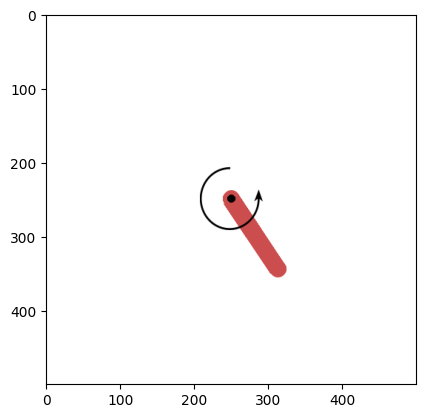

In [ ]:
import matplotlib.pyplot as plt
test_env = wrap_env(gym.make(env_name))
state = test_env.reset()
print('Condição inicial..........',state)
action = [3/2]
state, reward, done, info = test_env.step(action)
print('Condição após 1 iteração..',state)

img = plt.imshow(test_env.render('rgb_array'))

In [ ]:
class Agent(object):

  def __init__(self):
    self.firstname = "Agent 01"

  def __repr__(self):
    return f"Name: {self.firstname}"

  def action(self, state):
    tau = 0
    x, y, w = state
    theta = np.rad2deg(np.arctan2(y,x))

    # TENTATIVA DE DIVIDIR A PARTE SUPERIOR EM SETORES E ADICIONAR UM TRATAMENTO
    # INDIVIDUAL PARA CADA SETOR

    # Parte superior, dividida em 3 setores:
    # Setor 1: intervalos de 60° a 90° e -60° a -90°
    if (theta < 90 and theta > 60) or (theta > -90 and theta < -60):
      if w > 0:
        tau = -2
      else:
        tau = +2

    # Setor 2: intervalos de 30° a 60° e -30° a -60°
    elif (theta < 60 and theta > 30) or (theta > -60 and theta < -30):
      if w > 0:
        tau = -1.8
      else:
        tau = +1.8

    # Setor 3: intervalo de 30° a -30°
    elif (theta < 30 and theta > -30):
      if w > 0:
        tau = -1.6
      else:
        tau = +1.6
    else:
      # parte inferior
      if w>0:
        tau = +2
      else:
        tau = -2

    return [tau]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
agent = Agent()
test_env = wrap_env(gym.make(env_name))
state = test_env.reset()
total_reward = 0
num_interacoes = 0

while True:
    test_env.render()
    action = agent.action(state)
    state, reward, done, info = test_env.step(action)
    total_reward += reward
    num_interacoes += 1
    if done:
        break

print("Recompensa total: ", (total_reward))
print("Número de interações: ",(num_interacoes))
print("Média das recompensas: ",(total_reward/num_interacoes))
test_env.close()
show_video()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environ

Recompensa total:  -2594.4551914652507
Número de interações:  1000
Média das recompensas:  -2.5944551914652507


##Conclusão:

  - Para resolver o problema do pêndulo, adotamos a seguinte estratégia:
    - Inicialmente, enquanto o pêndulo estiver na parte de baixo, aplicamos o torque máximo no mesmo sentido do deslocamento de forma que adquira velocidade angular suficiente para se posicinar na parte de cima do sistema.

    - Posteriormente, tentamos subdividir a parte superior em setores, com o intuito de frear o pêndulo. A ideia é que quanto mais próximo estiver da condição de parada, menor será o torque aplicado, torque este com o sentido contrário do movimento.